# Final Processing
The final processing stage requires:
1. Quick validation of catalogues and Bayesian Pvalue maps
2. Skewness level
3. Adding flag to catalogue

In [1]:
import seaborn as sns
from astropy.table import Table
%matplotlib inline
import numpy as np
import pylab as plt

## Read tables

In [2]:
cat=Table.read('../data/CDFS-SWIRE/PACS/dmu26_XID+PACS_CDFS-SWIRE_20171019.fits')


In [3]:
cat[0:10]

help_id,RA,Dec,F_PACS_100,FErr_PACS_100_u,FErr_PACS_100_l,F_PACS_160,FErr_PACS_160_u,FErr_PACS_160_l,Bkg_PACS_100,Bkg_PACS_160,Sig_conf_PACS_100,Sig_conf_PACS_160,Rhat_PACS_100,Rhat_PACS_160,n_eff_PACS_100,n_eff_PACS_160,Pval_res_100,Pval_res_160
,degrees,degrees,mJy,mJy,mJy,mJy,mJy,mJy,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,,,,,,
str27,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
HELP_J033650.824-295620.783,54.21176639,-29.939106486,6.87275,16.2245,1.78597,13.6253,27.3919,4.32662,5.85037,4.14517,3.95679,0.289239,1.00055,1.00093,2000.0,2000.0,0.003,0.0
HELP_J033655.442-295449.596,54.2310102146,-29.9137765914,20.6963,36.8386,7.17254,52.5302,71.8413,33.7153,5.07407,4.70184,2.50966,0.273807,0.999138,1.00028,2000.0,1069.0,0.0,0.0
HELP_J033616.314-295548.181,54.0679762,-29.930050306,20.4869,36.9846,7.26307,10.0954,21.9491,3.04819,4.86817,3.09368,0.162121,0.150051,0.998687,0.998595,2000.0,2000.0,0.0,0.0
HELP_J033601.094-295546.425,54.0045569,-29.929562436,26.0394,45.0952,10.3994,35.1703,55.4868,17.5868,3.95185,4.14887,0.168648,0.160877,0.999148,0.99955,1100.0,1228.0,0.0,0.0
HELP_J033606.888-295518.496,54.0287013,-29.921804496,19.1804,37.2356,6.11049,12.3666,26.795,3.84751,4.58486,3.36094,0.137129,0.13689,1.00177,1.0003,2000.0,2000.0,0.0,0.0
HELP_J033607.350-295516.790,54.03062359,-29.921330436,37.0479,57.8534,18.3395,16.7424,31.4419,5.55697,4.58486,3.36094,0.137129,0.13689,0.998624,1.00164,2000.0,1629.0,0.0,0.0
HELP_J033610.856-295506.940,54.04523478,-29.918594406,38.9425,60.466,19.7534,39.9349,58.8555,20.5389,4.58486,3.36094,0.137129,0.13689,0.99846,1.00126,1430.0,891.0,0.0,0.0
HELP_J033555.160-295410.647,53.97983175,-29.902957406,140.717,159.889,121.065,98.4569,115.299,81.2531,4.326,3.08357,0.150315,0.130711,0.999733,0.999802,2000.0,2000.0,0.0,0.0


In [4]:
from astropy import units as u
cat['RA'].unit=u.degree
cat['Dec'].unit=u.degree

## Look at Symmetry of PDFs to determine depth level of catalogue

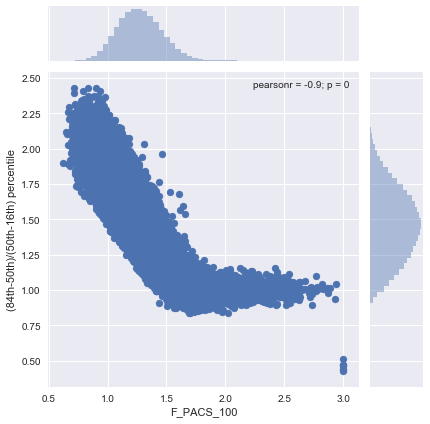

In [5]:
skew=(cat['FErr_PACS_100_u']-cat['F_PACS_100'])/(cat['F_PACS_100']-cat['FErr_PACS_100_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(cat['F_PACS_100']),y=skew, kind='scatter')

For 100 $\mathrm{\mu m}$ depth is ~ 30mJy

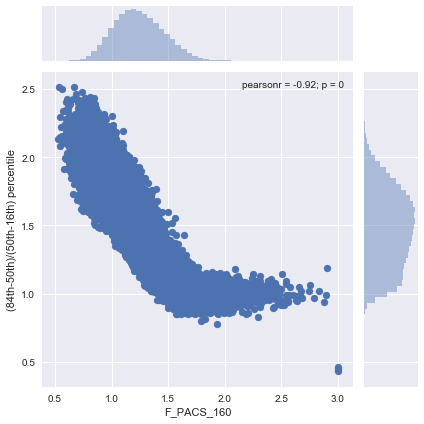

In [6]:
skew=(cat['FErr_PACS_160_u']-cat['F_PACS_160'])/(cat['F_PACS_160']-cat['FErr_PACS_160_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(cat['F_PACS_160']),y=skew, kind='scatter')

For 160 $\mathrm{\mu m}$ depth is ~ 30mJy

## Add flag to catalogue

In [7]:
from astropy.table import Column
cat.add_column(Column(np.zeros(len(cat), dtype=bool),name='flag_PACS_100'))
cat.add_column(Column(np.zeros(len(cat), dtype=bool),name='flag_PACS_160'))



In [8]:
ind_100=(cat['Pval_res_100']>0.5) | (cat['F_PACS_100'] < 30)
ind_160=(cat['Pval_res_160']>0.5) | (cat['F_PACS_160'] < 30) 


In [9]:
print(ind_100.sum(),ind_160.sum(),len(cat))

205845 203736 240489


In [10]:
cat['flag_PACS_100'][ind_100]=True
cat['flag_PACS_160'][ind_160]=True


In [12]:
cat.write('../data/CDFS-SWIRE/PACS/dmu26_XID+PACS_CDFS-SWIRE_cat_20171019.fits', format='fits',overwrite=True)


## Check maps

In [14]:
from astropy.io import fits

In [15]:
pacs100_pval=fits.open('../data/CDFS-SWIRE/PACS/dmu26_XID+PACS_PACS_100_CDFS-SWIRE_Bayes_Pval_20171005.fits')
pacs160_pval=fits.open('../data/CDFS-SWIRE/PACS/dmu26_XID+PACS_PACS_160_CDFS-SWIRE_Bayes_Pval_20171005.fits')

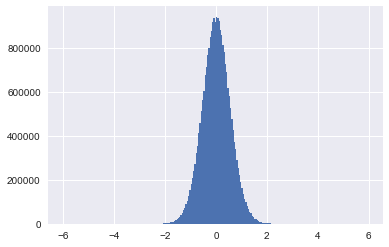

In [22]:
plt.hist(pacs100_pval[1].data[np.isfinite(pacs100_pval[1].data)],bins=np.arange(-6,6,0.05));

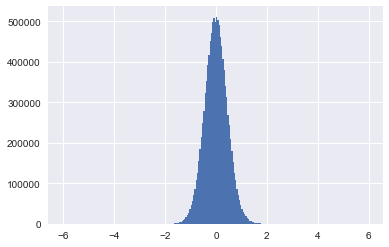

In [23]:
plt.hist(pacs160_pval[1].data[np.isfinite(pacs160_pval[1].data)],bins=np.arange(-6,6,0.05));

## Check cat

In [24]:
old_cat=Table.read('../data/CDFS-SWIRE/PACS/WP4-CDFS-SWIRE-PACSxID24-v1.fits.gz')

In [28]:
old_cat['RA'].unit=u.degree
old_cat['Dec'].unit=u.degree

In [30]:
old_cat

XID,RA,Dec,F_PACS_100__A4,F_PACS_100__A5,F_PACS_100__A6,F_PACS_100__A7,F_PACS_100__A8,F_PACS_100__A10,F_PACS_100,Ferr_PACS_100__A4,Ferr_PACS_100__A5,Ferr_PACS_100__A6,Ferr_PACS_100__A7,Ferr_PACS_100__A8,Ferr_PACS_100__A10,Ferr_PACS_100,F_PACS_100__SKY,F_PACS_160__A4,F_PACS_160__A5,F_PACS_160__A6,F_PACS_160__A7,F_PACS_160__A8,F_PACS_160__A10,F_PACS_160,Ferr_PACS_160__A4,Ferr_PACS_160__A5,Ferr_PACS_160__A6,Ferr_PACS_160__A7,Ferr_PACS_160__A8,Ferr_PACS_160__A10,Ferr_PACS_160,F_PACS_160__SKY,HELP_ID
,deg,deg,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy / pix,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy / pix,
int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str21
20269,51.3391,-29.6326,5.80525,9.10904,9.52371,8.90982,9.87109,16.1481,0.960175,10.9545,10.2805,10.4431,10.9296,11.7329,13.4598,8.54818,0.0,17.5657,16.0669,17.1881,18.7219,23.2457,30.4306,21.9574,18.1397,15.2603,14.225,13.5566,13.3353,14.2112,10.8895,0.0,CDS-PACSxID24-1-00001
9465,51.3404,-29.5366,37.1872,36.8413,32.099,29.5196,28.2173,30.7685,30.7021,10.9781,10.2845,10.4078,10.9001,11.7103,13.4265,8.53753,0.0,63.0557,59.6926,59.6764,60.0185,60.3393,61.5365,53.9875,19.0148,15.9282,14.8685,14.2821,14.1632,15.0268,10.9488,0.0,CDS-PACSxID24-1-00002
32785,51.3417,-29.6128,40.1389,41.569,41.6262,41.6549,48.1906,63.5627,25.1915,11.258,10.5272,10.7061,11.1753,11.9642,13.7515,8.81871,0.0,2.46996,-3.51323,-4.20904,-2.81796,-0.26346,1.12468,16.2734,18.6486,15.8986,14.9312,14.2132,13.8468,14.5681,11.1448,0.0,CDS-PACSxID24-1-00003
60323,51.3436,-29.6118,22.0892,21.0967,22.4059,20.2713,15.4865,23.8448,3.80425,11.086,10.509,10.735,11.1713,11.9713,13.6328,8.65524,0.0,6.87234,1.42008,1.1628,2.5351,0.156342,-4.5212,8.33736,18.4275,15.682,14.7175,14.044,13.7558,14.517,11.1362,0.0,CDS-PACSxID24-1-00004
22332,51.3443,-29.5597,21.7853,19.5587,19.0401,23.1344,31.0047,41.9829,25.3307,11.3134,10.5788,10.8004,11.2801,12.0131,13.7747,8.78858,0.0,-3.77195,-2.73229,-3.90126,-4.01867,-1.35882,-1.09863,10.3223,18.2565,15.6621,14.7207,14.0263,13.6915,14.5277,11.1758,0.0,CDS-PACSxID24-1-00005
18577,51.3449,-29.5822,-9.65322,-6.59912,-5.24355,-3.83109,-5.384,-16.1549,-0.769118,11.1482,10.3816,10.4948,10.9838,11.7589,13.499,8.6653,0.0,7.4133,8.82751,12.8263,15.9227,21.4362,25.5777,42.2368,18.1161,15.3303,14.3075,13.6264,13.38,14.2146,10.9573,0.0,CDS-PACSxID24-1-00006
51911,51.3451,-29.6181,14.2468,11.2671,10.6499,6.22995,2.58583,-1.99709,15.2052,11.2722,10.4884,10.7116,11.2265,11.9926,13.7069,8.66916,0.0,5.21845,7.09556,10.6759,10.4271,9.68967,13.277,14.2788,18.702,15.8801,14.8524,14.1734,13.862,14.6394,11.2637,0.0,CDS-PACSxID24-1-00007
19642,51.3451,-29.6764,-10.7898,-12.8643,-13.062,-11.6732,-10.9978,2.1182,-8.33675,11.1092,10.368,10.5964,11.1072,11.8695,13.6347,8.68843,0.0,50.9411,51.5546,49.9911,47.5871,47.1265,51.2473,26.5581,18.2558,15.642,14.7067,14.0133,13.692,14.3928,11.1234,0.0,CDS-PACSxID24-1-00008


In [29]:
from astropy.coordinates import SkyCoord
from astropy import units as u
c = SkyCoord(ra=cat['RA'], dec=cat['Dec'])  
catalog = SkyCoord(ra=old_cat['RA'], dec=old_cat['Dec'])  
idx, d2d, d3d = c.match_to_catalog_sky(catalog)  

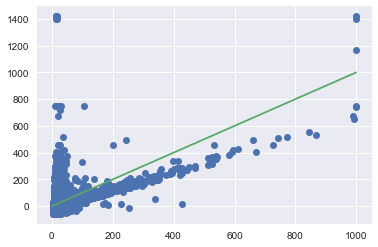

In [34]:
plt.plot(cat['F_PACS_100'],old_cat['F_PACS_100'][idx],'o' )
plt.plot(np.arange(0,1000),np.arange(0,1000))

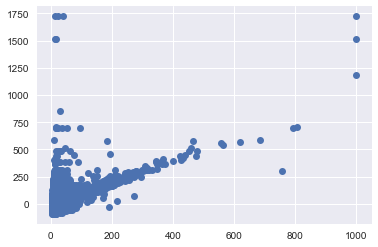

In [33]:
plt.plot(cat['F_PACS_160'],old_cat['F_PACS_160'][idx],'o' )